# Predict House Pricing Using Advanced 

###  (Gelişmiş Regresyon Teknikleriyle Konut Fiyat Tahmini)

<img src=https://images.homify.com/v1563887275/p/photo/image/3137603/mahir_bey_villa_mimari_1.jpg>

### Veri Seti: Ames Konut Fiyatları

Bu projede, Ames şehrindeki konutlara ait **1 hedef değişken** ve **79 açıklayıcı değişken** kullanılarak
ev satış fiyatı tahmin edilmektedir.

- **Hedef değişken**
  - `SalePrice`: Evin satış fiyatı (USD cinsinden).

- **Arsa ve çevre bilgileri**
  - `MSSubClass`: Bina sınıfı / konut tipi
  - `MSZoning`: İmar (zoning) sınıfı
  - `LotFrontage`: Yol cephesinin uzunluğu (feet)
  - `LotArea`: Arsa alanı (ft²)
  - `Neighborhood`: Mahalle / konum
  - `Condition1`, `Condition2`: Ana yola / tren yoluna yakınlık

- **Bina ve dış yapı özellikleri**
  - `BldgType`: Konut tipi (müstakil, ikiz vb.)
  - `HouseStyle`: Kat sayısı / ev stili
  - `YearBuilt`: İlk inşa yılı
  - `YearRemodAdd`: Yenileme yılı
  - `RoofStyle`, `RoofMatl`: Çatı tipi ve malzemesi
  - `Exterior1st`, `Exterior2nd`: Dış cephe kaplama türleri
  - `MasVnrType`, `MasVnrArea`: Taş kaplama türü ve alanı
  - `ExterQual`, `ExterCond`: Dış cephe malzeme kalitesi ve durumu
  - `Foundation`: Temel tipi

- **Bodrum (basement) özellikleri**
  - `BsmtQual`, `BsmtCond`: Bodrum yüksekliği ve durumu
  - `BsmtExposure`: Bodrumun dışarıya açılım durumu
  - `BsmtFinType1`, `BsmtFinSF1`: Bitmiş bodrum alanı (tip 1)
  - `BsmtFinType2`, `BsmtFinSF2`: Bitmiş bodrum alanı (tip 2)
  - `BsmtUnfSF`: Bitmemiş bodrum alanı
  - `TotalBsmtSF`: Toplam bodrum alanı

- **İç alan ve oda bilgileri**
  - `1stFlrSF`, `2ndFlrSF`: 1. ve 2. kat alanı
  - `GrLivArea`: Zemin üstü yaşanabilir alan (ft²)
  - `Bedroom`: Bodrum üstü yatak odası sayısı
  - `Kitchen`, `KitchenQual`: Mutfak sayısı ve mutfak kalitesi
  - `TotRmsAbvGrd`: Banyo hariç toplam oda sayısı
  - `FullBath`, `HalfBath`: Tam ve yarım banyolar
  - `Fireplaces`, `FireplaceQu`: Şömine sayısı ve kalitesi
  - `Functional`: Evin fonksiyonellik durumu

- **Isıtma, soğutma ve tesisat**
  - `Heating`, `HeatingQC`: Isıtma tipi ve kalitesi
  - `CentralAir`: Merkezi klima var/yok
  - `Electrical`: Elektrik tesisatı tipi

- **Garaj ve dış alanlar**
  - `GarageType`, `GarageFinish`: Garaj konumu ve iç döşemesi
  - `GarageYrBlt`: Garajın yapım yılı
  - `GarageCars`: Garajın araç kapasitesi
  - `GarageArea`: Garaj alanı (ft²)
  - `GarageQual`, `GarageCond`: Garaj kalitesi ve durumu
  - `PavedDrive`: Arabanın park ettiği yolun asfaltlanma durumu
  - `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`:
    Deck ve çeşitli veranda/porch alanları
  - `PoolArea`, `PoolQC`: Havuz alanı ve kalitesi
  - `Fence`: Çit kalitesi
  - `MiscFeature`, `MiscVal`: Diğer ekstra özellikler ve parasal değeri

- **Satış bilgileri**
  - `MoSold`, `YrSold`: Satış ayı ve yılı
  - `SaleType`: Satış tipi
  - `SaleCondition`: Satış koşulu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Data Preparation

### 1.1 Missing Values (Eksik Değer Analizi)

Bu adımda eğitim (`train.csv`) ve test (`test.csv`) veri setlerini okudum ve
birleştirerek `df` isimli tek bir DataFrame oluşturdum. Daha sonra:

- Hangi sütunda kaç adet eksik değer olduğunu `df.isnull().sum()` ile inceledim.
- Sadece eksik değeri olan değişkenleri filtreledim.
- Eksik değerleri değişken türüne ve anlamına göre farklı stratejilerle doldurdum.

### EDA — Exploratory Data Analysis (Keşifsel Veri Analizi)

Bu bölümde veri setini tanımak için temel keşifsel analizler yaptım.  
Amaç: verinin yapısını anlamak, eksik değerleri görmek, dağılımları incelemek ve hedef değişken **SalePrice** ile ilişkili önemli değişkenleri keşfetmektir.

#### 🔹 Veri Ön İncelemesi
- Veri setinin ilk satırlarını görüntüledim (`head`)
- Değişken türlerini inceledim (`info`)
- Sayısal değişkenlerin istatistiksel özetini çıkardım (`describe`)
Bu adım veri setinin genel yapısını anlamamı sağladı.
### 🔹 Önemli Değişkenlerin SalePrice ile İlişkisi
Fiyat tahmininde etkili olduğu bilinen bazı değişkenlerle ilişkileri görselleştirdim:
- **OverallQual vs SalePrice** (countplot)
- **GrLivArea vs SalePrice** (scatter plot)

In [2]:
df1 = pd.read_csv("train.csv")

In [3]:
df1.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [4]:
df1.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df1.SalePrice.value_counts()

SalePrice
140000    20
135000    17
145000    14
155000    14
190000    13
          ..
410000     1
156932     1
144152     1
216000     1
274300     1
Name: count, Length: 663, dtype: int64

In [7]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df1.shape

(1460, 81)

In [9]:
df2=pd.read_csv("test.csv")

In [10]:
df2.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [11]:
df2.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [14]:
df2.shape

(1459, 80)

In [15]:
df=pd.concat([df1,df2]) #df1 ve df2 birleştirildi

In [16]:
df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0


In [17]:
df.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [18]:
df.shape

(2919, 81)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

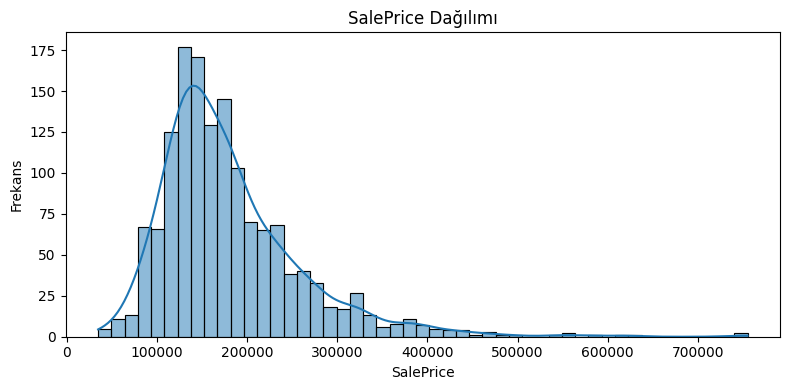

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df1["SalePrice"], kde=True)
plt.title("SalePrice Dağılımı")
plt.xlabel("SalePrice")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()

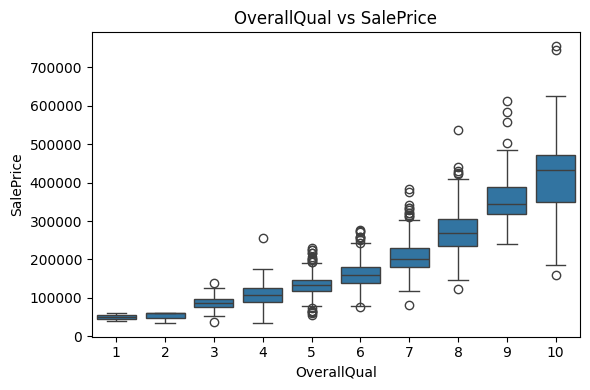

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df1["OverallQual"], y=df1["SalePrice"])
plt.title("OverallQual vs SalePrice")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

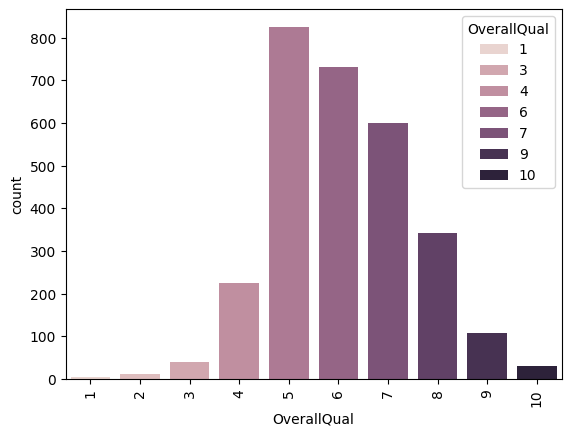

In [22]:
sns.countplot(x=df['OverallQual'], hue=df['OverallQual'])
plt.xticks(rotation=90); 

<Axes: xlabel='count', ylabel='OverallQual'>

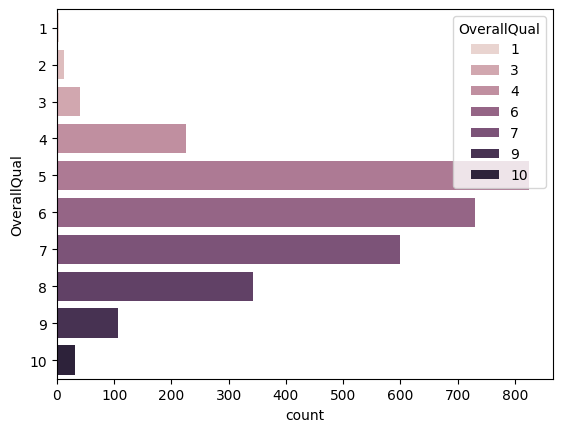

In [23]:
sns.countplot(y=df['OverallQual'], hue=df['OverallQual'])

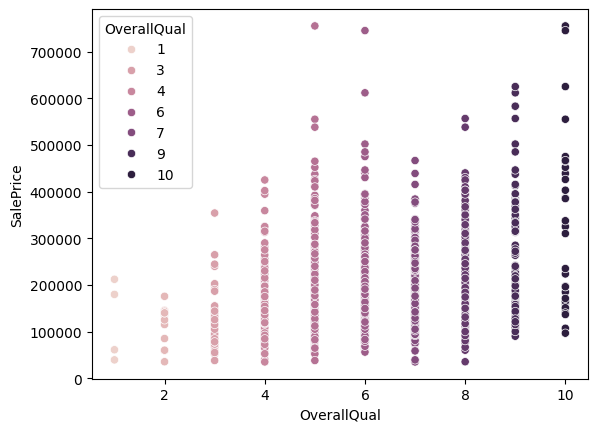

In [24]:
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'], hue=df['OverallQual']);

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

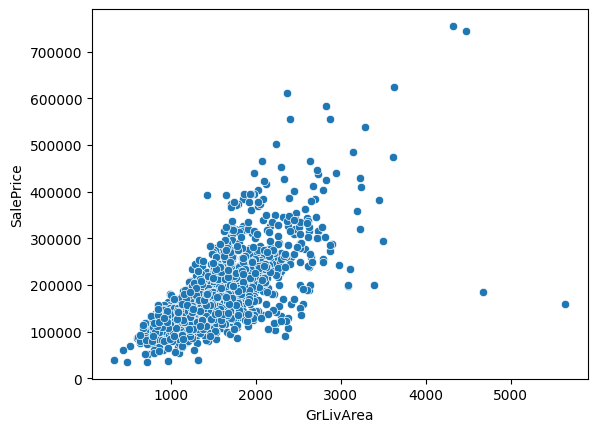

In [25]:
sns.scatterplot(x=df1["GrLivArea"], y=df1["SalePrice"])

In [26]:
df.isnull().sum()[df.isnull().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

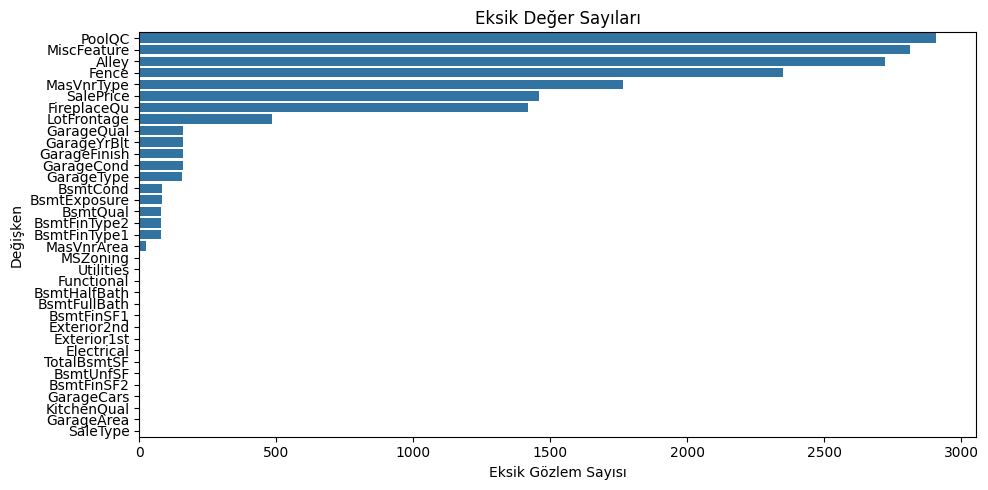

In [27]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Eksik Değer Sayıları")
plt.xlabel("Eksik Gözlem Sayısı")
plt.ylabel("Değişken")
plt.tight_layout()
plt.show()

### 1.2 Categorical, Numeric ve Ranking Değişkenler

- `object` tipindeki değişkenleri *categorical* (kategorik) olarak,
- `int` ve `float` tipindekileri *numeric* (sayısal) olarak ele aldım.
- `OverallQual` gibi sıralı (ranking) kalite değişkenlerini de sayısal olarak tuttum.

Bu ayrım sayesinde:
- Kategorik değişkenler için daha sonra **one-hot encoding (get_dummies)** uyguladım.
- Sayısal değişkenler için eksik değer doldurma ve ölçekleme (gerekirse) işlemleri yaptım.

### 1.3 Eksik Değer Doldurma Stratejisi

Eksik değerleri aşağıdaki mantıkla doldurdum:

- Yapısal olarak **yok** anlamına gelen sayısal değişkenleri `0` ile doldurdum  
  (örneğin: `GarageArea`, `GarageCars`, `BsmtFinSF1`, `BsmtFullBath` vb.).

- Yapısal olarak **özellik yok** anlamına gelen kategorik değişkenleri `"None"` ile doldurdum  
  (örneğin: `GarageType`, `FireplaceQu`, `PoolQC`, `Fence`, `BsmtQual` vb.).

- Bazı kategorik değişkenlerde eksikliği **bilinmiyor** anlamında düşünerek
  **mod (en sık değer)** ile doldurdum  
  (`MSZoning`, `KitchenQual`, `Functional`, `SaleType`, `Electrical`, `Utilities`, `Exterior1st`, `Exterior2nd`).

- `LotFrontage` değişkeninde eksik değerleri, evin bulunduğu **Neighborhood**’a göre
  mahalle medyanı ile doldurdum:

- `GarageYrBlt` değişkeninde eksik değerleri `0` ile doldurdum.

In [28]:
mode_cols = ["MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "Electrical", "KitchenQual", "Functional", "SaleType"]
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [29]:
zero_cols = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea"]
for col in zero_cols:
    df[col] = df[col].fillna(0)

In [30]:
none_cols = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in none_cols:
    df[col] = df[col].fillna("None")

In [31]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [32]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

In [33]:
df.isnull().sum()[df.isnull().sum() > 0]

SalePrice    1459
dtype: int64

## 2. Feature Engineering ve Encoding

Bu adımda:

- Modelde işe yaramayacak olan `Id` değişkenini sildim.
- Hedef değişken olan `SalePrice`'ı `y` olarak ayırdım, feature set'ten çıkardım.
- Kategorik değişkenleri tespit edip `pd.get_dummies(..., drop_first=True)` ile 
  one-hot encoding uyguladım.
- Sonuç olarak, tamamen sayısal özelliklerden oluşan bir veri seti elde ettim.

In [34]:
del df["Id"]

In [35]:
y = df["SalePrice"]

In [36]:
df = df.drop("SalePrice", axis=1)

In [37]:
cat_cols = df.select_dtypes(include=["object"]).columns

In [38]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [39]:
x = df

In [40]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


## 3. Modeling (Modelleme)

Bu aşamada:

1. Temizlenmiş ve encode edilmiş birleşik veri setini tekrar
   **eğitim (ilk 1460 satır)** ve **test (son 1459 satır)** olarak ayırdım.
2. Eğitim verisini `train_test_split` ile train ve validation olarak böldüm.
3. Farklı regresyon modelleri kurup (Linear Regression, Decision Tree,
   Random Forest, Gradient Boosting, XGBoost) performanslarını karşılaştırdım.
4. Her model için MAE, RMSE ve R² metriklerini hesapladım ve sonuçları
   tek bir tabloda topladım.

### 3.1 Train / Validation Ayrımı

Model performansını değerlendirebilmek için eğitim verisini
%80 train, %20 validation olacak şekilde böldüm.

In [41]:
x = df[:1460]

In [42]:
y = y[:1460]

In [43]:
x_test = df[1460:]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)  # Hitchhiker's Guide to the Galaxy

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
tahmin_lr = lr.predict(x_test)

In [51]:
mae_lr = mean_absolute_error(y_test, tahmin_lr)

In [52]:
rmse_lr = np.sqrt(mean_squared_error(y_test, tahmin_lr))

In [53]:
r2_lr = r2_score(y_test, tahmin_lr)

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt = DecisionTreeRegressor()

In [56]:
dt.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [57]:
tahmin_dt = dt.predict(x_test)

In [58]:
mae_dt = mean_absolute_error(y_test, tahmin_dt)

In [59]:
rmse_dt = np.sqrt(mean_squared_error(y_test, tahmin_dt))

In [60]:
r2_dt = r2_score(y_test, tahmin_dt)

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor()

In [63]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
tahmin_rf = rf.predict(x_test)

In [65]:
mae_rf = mean_absolute_error(y_test, tahmin_rf)

In [66]:
rmse_rf = np.sqrt(mean_squared_error(y_test, tahmin_rf))

In [67]:
r2_rf = r2_score(y_test, tahmin_rf)

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
gbr = GradientBoostingRegressor()

In [70]:
gbr.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [71]:
tahmin_gbr = gbr.predict(x_test)

In [72]:
mae_gbr = mean_absolute_error(y_test, tahmin_gbr)

In [73]:
rmse_gbr = np.sqrt(mean_squared_error(y_test, tahmin_gbr))

In [74]:
r2_gbr = r2_score(y_test, tahmin_gbr)

In [75]:
from xgboost import XGBRegressor

In [76]:
xgb = XGBRegressor()

In [77]:
xgb.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [78]:
tahmin_xgb = xgb.predict(x_test)

In [79]:
mae_xgb = mean_absolute_error(y_test, tahmin_xgb)

In [80]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, tahmin_xgb))

In [81]:
r2_xgb = r2_score(y_test, tahmin_xgb)

### 3.2 Modellerin Karşılaştırılması

Aşağıdaki tabloda kurduğum modeller için hesaplanan MAE, RMSE ve R² skorları yer almaktadır.
En düşük RMSE ve en yüksek R² değerine sahip model olarak **Gradient Boosting** ve
**XGBoost** öne çıkmaktadır.

In [82]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost"
    ],
    "MAE": [
        mae_lr, mae_dt, mae_rf, mae_gbr, mae_xgb
    ],
    "RMSE": [
        rmse_lr, rmse_dt, rmse_rf, rmse_gbr, rmse_xgb
    ],
    "R2": [
        r2_lr, r2_dt, r2_rf, r2_gbr, r2_xgb
    ]
})

print(results)

               Model           MAE          RMSE        R2
0  Linear Regression  23943.147545  83112.683318  0.099423
1      Decision Tree  26985.630137  40995.857790  0.780888
2      Random Forest  17500.199589  28398.085075  0.894861
3  Gradient Boosting  17743.900153  28929.373245  0.890890
4            XGBoost  17435.206884  27887.196539  0.898610


## 4. Kaggle İçin Submission Oluşturma (XGBoost ile Final Model)

Eğitim/validasyon sonuçlarında en düşük RMSE değerini veren model **XGBoost** olduğu için,
final submission dosyasını bu model ile oluşturdum. Modeli tüm eğitim verisi üzerinde
yeniden eğittim ve Kaggle test veri seti için `SalePrice` tahminleri ürettim.

In [91]:
x_full = df[:1460]

In [92]:
x_test_final = df[1460:]

In [93]:
y_full = y[:1460]

In [94]:
xgb_final = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

In [95]:
xgb_final.fit(x_full, y_full)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [96]:
test_preds = xgb_final.predict(x_test_final)

In [97]:
submission = pd.DataFrame({"Id": df2["Id"],"SalePrice": test_preds})

In [98]:
submission.to_csv("submission_xgb.csv", index=False)